In [ ]:
##@Author: Gemma Gordon
#@Date: January 2022
# Script to analyse framework amino acid composition for sequence datasets

Comparing AA composition of framework residues 

In [1]:
#Import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import ast

%matplotlib inline

In [2]:
import logomaker as lm

In [3]:
all_positions_interest = [66, 52, 55, 42, 50, 118, 69, 67, 40, 2]

In [4]:
# https://www.imgt.org/IMGTScientificChart/Nomenclature/IMGT-FRCDRdefinition.html
fw_def = dict()
fw_def["fw1"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
fw_def["fw2"] = [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
fw_def["fw3"] = [66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104] 
fw_def["fw4"] = [118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]

In [8]:
sdabs_df = pd.read_csv('sdabs_final_seq_dataset.csv', usecols=['ANARCI_numbering'])
abs_df = pd.read_csv('abs_final_seq_dataset.csv', usecols=['ANARCI_numbering'])

In [9]:
len(sdabs_df)

1601636

In [10]:
len(abs_df)

1621889

Get just the residues shown to be in the paratope in the solved structures

In [12]:
def get_fw_paratope_res(anarci_list):

    all_fw1_res = []
    all_fw2_res = []
    all_fw3_res = []
    all_fw4_res = []

    for row in anarci_list:

        row = ast.literal_eval(row)

        try:
            fw1_res = row['fwh1']['2 ']
            all_fw1_res.append(fw1_res)
        except:
            fw1_res = ''
            all_fw1_res.append(fw1_res)

        fw2_res_list = []
        for position in ['40 ', '42 ', '50 ', '52 ', '55 ']:
            try:
                fw2_res = [row['fwh2'][position]]
                fw2_res_list.append(fw2_res)
            except:
                fw2_res = ''
                fw2_res_list.append(fw2_res)
        all_fw2_res.append([f for l in fw2_res_list for f in l])

        fw3_res_list = []
        for position in ['66 ', '67 ', '69 ']:
            try: 
                fw3_res = [row['fwh3'][position]]
                fw3_res_list.append(fw3_res)
            except:
                fw3_res = ''
                fw3_res_list.append(fw3_res)
        all_fw3_res.append([f for l in fw3_res_list for f in l])

        try:
            fw4_res = row['fwh4']['118 ']
            all_fw4_res.append(fw4_res)
        except:
            fw4_res = ''
            all_fw4_res.append(fw4_res)

    fw1_df = pd.DataFrame(all_fw1_res, columns=['2'])
    fw2_df = pd.DataFrame(all_fw2_res, columns=['40', '42', '50', '52', '55'])
    fw3_df = pd.DataFrame(all_fw3_res, columns=['66', '67', '69'])
    fw4_df = pd.DataFrame(all_fw4_res, columns=['118'])

    paratope_df = pd.concat([fw1_df, fw2_df, fw3_df, fw4_df], axis=1)
    paratope_df = paratope_df.reset_index()

    return paratope_df

In [13]:
sdabs_paratope_df = get_fw_paratope_res(sorted(sdabs_anarci))

In [14]:
sdabs_paratope_df.shape

(1601636, 11)

In [15]:
abs_paratope_df = get_fw_paratope_res(sorted(abs_anarci))

In [16]:
abs_paratope_df.shape

(1621889, 11)

In [26]:
abs_paratope_df.head()

,index,2,40,42,50,52,55,66,67,69,118
0,0,A,H,V,L,W,G,N,Y,D,W
1,1,A,S,V,L,W,S,Y,H,D,W
2,2,A,X,V,L,W,S,Y,H,D,W
3,3,A,I,V,L,W,R,D,Y,A,W
4,4,A,S,V,R,G,R,D,Y,A,W


In each set of FW results (fw1/2/3/4), for each position, get proportions of each amino acid

In [32]:
def get_comp_per_position(df):

        # transpose df into correct orientation to read cols
        df = df.drop(labels='index', axis=1) #(labels='fw_label', axis=1)
        #df = df.transpose()

        # read each column and return counts for each amino acid 
        # https://biopython.org/docs/1.76/api/Bio.Alphabet.IUPAC.html
        # NOTE 'X' is for unknowns
        amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']#, 'X']
        df = df.replace(to_replace=['X', ''], value=np.nan)
        # for each amino acid, find its proportion at each position
        props_per_position_dicts = []
        for col in sorted(df.columns):
                #if col.strip().isnumeric() == True: # if not an insertion position 
                        props = df[col].value_counts(normalize=True, dropna=True)
                        counts = df[col].value_counts(dropna=True) # get counts

                        props_dict = dict()
                        for aa, val in zip(props.index, list(props)):
                                props_dict[aa] = val
                        for aa in amino_acids:
                                # if no instances of an amino acid at position, set proportion as 0
                                if aa not in props_dict.keys():
                                        props_dict[aa] = 0.0
                        final_dict = dict()
                        final_dict[col.strip()] = props_dict # add key for which column (position) proportions are for
                        
                        props_per_position_dicts.append(final_dict)

        return props_per_position_dicts

In [77]:
abs_props = get_comp_per_position(abs_paratope_df)

In [78]:
sdabs_props = get_comp_per_position(sdabs_paratope_df)

Turn each list of dict of proportions into df with positions as cols and amino acid as index

In [30]:
def format_df(props_dfs):#, fwr):

    amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    dfs = []
    keys = []
    for item in props_dfs:#[fwr]:
        for key in item.keys():
            df = pd.DataFrame.from_dict(item[key], orient='index')
        dfs.append(df)
        keys.append(key)

    results = pd.concat(dfs, axis=1)
    results.columns = keys

    # remove '' (X) from proportions df 
    results = results.transpose()
    #results = results.drop(labels='', axis=1)
    results = results[amino_acids].transpose()
    
    return results 

In [83]:
abs_final_props = format_df(abs_props)

In [84]:
abs_final_props

,118,2,40,42,50,52,55,66,67,69
A,4.942577e-06,0.008118,0.026987,0.006500,0.003653,0.000331,0.059045,0.012970,0.000477,0.065816
C,7.018459e-04,0.000000,0.001604,0.000442,0.000138,0.005671,0.003324,0.000415,0.001762,0.000027
D,4.324754e-06,0.000588,0.012016,0.000229,0.000142,0.000132,0.009155,0.066752,0.003019,0.376894
E,2.471288e-06,0.010016,0.000637,0.000210,0.001215,0.000269,0.062965,0.024223,0.000371,0.019675
F,6.240003e-05,0.000853,0.001474,0.014208,0.003580,0.002586,0.029002,0.033757,0.016479,0.000101
G,1.336967e-03,0.003658,0.142399,0.007743,0.003671,0.027148,0.098932,0.033562,0.000136,0.008338
H,2.471288e-06,0.000030,0.207797,0.000090,0.000314,0.000535,0.019019,0.034090,0.016330,0.002412
I,1.235644e-06,0.037304,0.005755,0.285536,0.000948,0.000270,0.048796,0.010353,0.001484,0.000398
K,2.594853e-05,0.000139,0.000808,0.000015,0.000071,0.000022,0.002472,0.032485,0.000338,0.001682
L,6.839290e-04,0.070164,0.018581,0.017036,0.930820,0.003775,0.052083,0.005917,0.003913,0.002588


In [86]:
sdabs_final_props = format_df(sdabs_props)

In [87]:
sdabs_final_props

,118,2,40,42,50,52,55,66,67,69
A,0.002425,3.760746e-04,0.214121,0.005022,0.000845,0.057150,0.265764,0.036311,0.002891,0.027432
C,0.002377,0.000000e+00,0.001679,0.000743,0.044993,0.001869,0.013302,0.002477,0.003989,0.000075
D,0.000491,2.116743e-06,0.008193,0.000684,0.000455,0.001847,0.011478,0.041313,0.003913,0.811670
E,0.008024,1.368827e-04,0.001766,0.000198,0.000896,0.020220,0.004970,0.013917,0.000483,0.049432
F,0.009961,6.350228e-06,0.004069,0.575239,0.006416,0.011004,0.016079,0.038880,0.007464,0.000281
G,0.007823,1.220655e-04,0.465610,0.001120,0.002284,0.470880,0.105415,0.013599,0.000385,0.027505
H,0.000929,0.000000e+00,0.013608,0.002471,0.005087,0.000326,0.015872,0.027980,0.008171,0.005053
I,0.001150,2.822323e-06,0.005548,0.020319,0.001453,0.001040,0.022140,0.019007,0.006377,0.000432
K,0.005424,0.000000e+00,0.001787,0.000087,0.000346,0.005090,0.003095,0.022030,0.000178,0.002645
L,0.020121,2.384863e-04,0.001471,0.018915,0.275520,0.050533,0.018855,0.017919,0.005411,0.000751


In [41]:
# set colour palette 
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']#, 'X']

colors = ['lightcoral', 'firebrick', 'red', 'coral', 'sandybrown', 
            'darkgoldenrod', 'gold', 'olive', 'yellowgreen', 'lawngreen', 
            'darkgreen', 'teal', 'aqua', 'deepskyblue', 'royalblue', 'navy', 
            'blueviolet', 'violet', 'fuchsia', 'mediumvioletred']#, 'deeppink', ]

colour_palette = dict()
for a, c in zip(amino_acids, colors):
    colour_palette[a] = c

In [20]:
import os

Logo plots of just positions shown in solved structures to be in paratope

In [39]:
def make_sequence_logo(df, colour_palette):

    # Function to make sequence logo figure of a dataframe in which for each position the fraction of all amino acid (classes) are stored

    #df = dict_fw_results[fwr]
    df = df.transpose()

    # change index (positions) to int from str and sort in order of position
    df.index = df.index.astype('int')
    df = df.sort_index(axis=0, ascending=True)
    # df.index = sorted(df.index)
    x_labels = sorted(df.index)
    df = df.reset_index()
    # Make figure
    logo = lm.Logo(df.drop(labels='index', axis=1), color_scheme=colour_palette, stack_order='small_on_top')

    # Improve figure
    # Give the right labels to plot
    logo.ax.set_ylabel("Normalised frequency", fontsize=12)
    logo.ax.set_xlabel("IMGT positions", fontsize=12)
    logo.ax.set_xticks(range(len(df)))
    logo.ax.set_xticklabels(x for x in list(x_labels)) 

    return

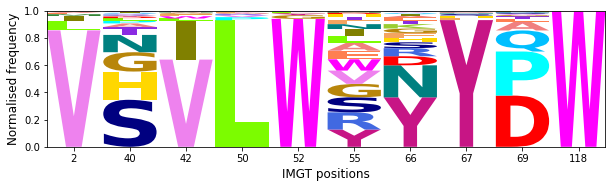

In [85]:
make_sequence_logo(abs_final_props, colour_palette)

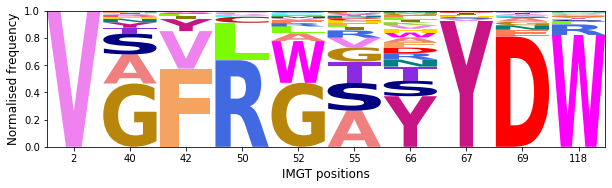

In [88]:
make_sequence_logo(sdabs_final_props, colour_palette)

get logo plots of individual amino acid compositions for structural data

In [3]:
# load in Henriette summary datasets
abs_struc = pd.read_csv("Dataset_flAbs_summary.csv")
sdabs_struc = pd.read_csv("Dataset_sdAbs_summary.csv")

In [4]:
import ast

In [5]:
from collections import defaultdict

In [6]:
# access paratope_arp col and extract values at keys corresponding to framework residues (2, 40, 42, 50, 52, 55, 66, 67, 69, 118)
def get_aa_comp_abs(struc_df, col):
    
    fr_residues = [str(i) for i in [2, 40, 42, 50, 52, 55, 66, 67, 69, 118]]

    all_rows = [] # get results for each row 

    for row in struc_df[col]: # for each row, which has dict of what AA at each position in paratope residues 
            aas = defaultdict(list) # collect list of amino acids found at that position
            try:
                row = ast.literal_eval(row) # read row as dict 
                for item in row: # for each chain in row 
                    for position in row[item].keys(): # for each position found in chain 
                        if position in fr_residues: # if its a paratope and framework residue 
                            aa = row[item][position] 
                            aas[position].append(aa) # collects amino acids at that position FOR THAT ROW
                            all_rows.append(aas)
            except: # fails on empty rows (nan)
                print(row)      

    # all_rows is list of residues found at framework positions for each row 
    # parse into df format of AA at each position
    all_rows_df = pd.DataFrame.from_dict([d for d in all_rows])
    for col in all_rows_df:
        vals = all_rows_df[col]
        new_vals = []
        for val in vals:
            try:
                new_val = val[0]
                new_vals.append(new_val)
            except: 
                new_val = np.nan
                new_vals.append(new_val)
        all_rows_df.drop(labels=[col], axis=1)
        all_rows_df[col] = new_vals

    return all_rows_df

In [7]:
abs_aa_comp_df = get_aa_comp_abs(abs_struc, 'paratope_arp')

nan
nan


In [8]:
abs_aa_comp_df

,55,66,2,69,52,67,40,42,118
0,E,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,F,V,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,F,V,NaN,NaN,NaN,NaN,NaN,NaN
4,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1559,W,N,I,R,W,NaN,NaN,NaN,NaN
1560,W,N,I,R,W,NaN,NaN,NaN,NaN
1561,W,N,I,R,W,NaN,NaN,NaN,NaN
1562,W,N,I,R,W,NaN,NaN,NaN,NaN


check number of entries per position (aa comp not representative if v few sequences)

In [25]:
def get_num_seqs(aa_comp_df, position):
    total = []
    for a in aa_comp_df[position]:
        if type(a) == str:
            total.append(a)
    print(position, len(total), (len(total)/len(aa_comp_df)*100)) # print number of sequences and as % of total set

    return 

In [26]:
for position in [str(i) for i in [2, 40, 42, 52, 55, 66, 67, 69, 118]]:
    get_num_seqs(abs_aa_comp_df, position)

2 225 14.38618925831202
40 202 12.915601023017903
42 3 0.1918158567774936
52 281 17.966751918158568
55 1174 75.06393861892583
66 1326 84.78260869565217
67 254 16.240409207161125
69 391 25.0
118 8 0.5115089514066496


^^ from this should remove position 42 and 118 as well as 50 (already not present at all)

In [20]:
# access paratope_arp col and extract values at keys corresponding to framework residues (2, 40, 42, 50, 52, 55, 66, 67, 69, 118)
def get_aa_comp_sdabs(struc_df, col):
    
    fr_residues = [str(i) for i in [2, 40, 42, 50, 52, 55, 66, 67, 69, 118]]

    all_rows = [] # get results for each row 

    for row in struc_df[col]: # for each row, which has dict of what AA at each position in paratope residues 
            aas = defaultdict(list) # collect list of amino acids found at that position
            try:
                row = ast.literal_eval(row) # read row as dict 
                for position in row.keys(): # for each position found in chain 
                    if position in fr_residues: # if its a paratope and framework residue 
                        aa = row[position] 
                        aas[position].append(aa) # collects amino acids at that position FOR THAT ROW
                        all_rows.append(aas)
            except:
                print(row)   

    # all_rows is list of residues found at framework positions for each row 
    # parse into df format of AA at each position
    all_rows_df = pd.DataFrame.from_dict([d for d in all_rows])
    for col in all_rows_df:
        vals = all_rows_df[col]
        new_vals = []
        for val in vals:
            try:
                new_val = val[0]
                new_vals.append(new_val)
            except: 
                new_val = np.nan
                new_vals.append(new_val)
        all_rows_df.drop(labels=[col], axis=1)
        all_rows_df[col] = new_vals

    return all_rows_df

In [21]:
sdabs_aa_comp_df = get_aa_comp_sdabs(sdabs_struc, 'paratope_arp')

In [22]:
sdabs_aa_comp_df

,55,66,118,52,50,69,67,40,42,2
0,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,R,W,W,P,NaN,NaN,NaN,NaN,NaN
3,NaN,R,W,W,P,NaN,NaN,NaN,NaN,NaN
4,NaN,R,W,W,P,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
729,NaN,H,W,L,NaN,NaN,NaN,A,L,NaN
730,NaN,H,W,L,NaN,NaN,NaN,A,L,NaN
731,NaN,H,W,L,NaN,NaN,NaN,A,L,NaN
732,NaN,H,W,L,NaN,NaN,NaN,A,L,NaN


In [23]:
for position in [str(i) for i in [2, 40, 42, 50, 52, 55, 66, 67, 69, 118]]:
    get_num_seqs(sdabs_aa_comp_df, position)

76 10.354223433242508
195 26.56675749318801
410 55.858310626703
300 40.87193460490463
496 67.57493188010899
405 55.177111716621255
599 81.60762942779292
199 27.111716621253407
179 24.38692098092643
257 35.013623978201636


In [24]:
# convert to dataframe with positions as columns, AAs as index, proportions at each position in rows
abs_aa_comp_df['index'] = abs_aa_comp_df.index
sdabs_aa_comp_df['index'] = sdabs_aa_comp_df.index

In [27]:
abs_aa_comp_df

,55,66,2,69,52,67,40,42,118,index
0,E,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,E,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,F,V,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,F,V,NaN,NaN,NaN,NaN,NaN,NaN,3
4,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...
1559,W,N,I,R,W,NaN,NaN,NaN,NaN,1559
1560,W,N,I,R,W,NaN,NaN,NaN,NaN,1560
1561,W,N,I,R,W,NaN,NaN,NaN,NaN,1561
1562,W,N,I,R,W,NaN,NaN,NaN,NaN,1562


In [33]:
abs_struc_df = format_df(get_comp_per_position(abs_aa_comp_df))

In [34]:
abs_struc_df['50'] = [0.0 for i in range(20)] # no residues at 50 in Abs set, add empty col
abs_struc_df.drop(labels=['42', '118'], axis=1)
abs_struc_df['42'] = [0.0 for i in range(20)] # 42 and 118 too few sequences, replace with empty col 
abs_struc_df['118'] = [0.0 for i in range(20)] 

In [35]:
abs_struc_df

,118,2,40,42,52,55,66,67,69,50
A,0.0,0.000000,0.000000,0.0,0.000000,0.028961,0.011312,0.000000,0.030691,0.0
C,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
D,0.0,0.000000,0.029703,0.0,0.000000,0.011925,0.051282,0.000000,0.046036,0.0
E,0.0,0.000000,0.024752,0.0,0.000000,0.057922,0.018100,0.000000,0.010230,0.0
F,0.0,0.000000,0.000000,0.0,0.010676,0.013629,0.051282,0.106299,0.007673,0.0
G,0.0,0.000000,0.000000,0.0,0.021352,0.025554,0.002262,0.000000,0.035806,0.0
H,0.0,0.000000,0.346535,0.0,0.000000,0.012777,0.010558,0.000000,0.010230,0.0
I,0.0,0.351111,0.000000,0.0,0.000000,0.005111,0.013575,0.000000,0.015345,0.0
K,0.0,0.000000,0.009901,0.0,0.000000,0.000000,0.053544,0.007874,0.000000,0.0
L,0.0,0.017778,0.000000,0.0,0.313167,0.019591,0.009050,0.322835,0.015345,0.0


In [36]:
sdabs_struc_df = format_df(get_comp_per_position(sdabs_aa_comp_df))

In [37]:
sdabs_struc_df

,118,2,40,42,50,52,55,66,67,69
A,0.023346,0.000000,0.266667,0.000000,0.000000,0.000000,0.261728,0.045075,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.051852,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.025641,0.012195,0.000000,0.000000,0.024691,0.108514,0.000000,0.748603
E,0.000000,0.000000,0.076923,0.000000,0.013333,0.000000,0.009877,0.006678,0.015075,0.111732
F,0.000000,0.000000,0.000000,0.187805,0.000000,0.157258,0.012346,0.020033,0.000000,0.000000
G,0.000000,0.000000,0.025641,0.000000,0.000000,0.038306,0.022222,0.000000,0.000000,0.027933
H,0.000000,0.000000,0.025641,0.000000,0.023333,0.000000,0.014815,0.041736,0.000000,0.000000
I,0.035019,0.000000,0.000000,0.000000,0.000000,0.000000,0.059259,0.010017,0.000000,0.000000
K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030050,0.000000,0.000000
L,0.000000,0.013158,0.000000,0.039024,0.196667,0.405242,0.069136,0.020033,0.000000,0.000000


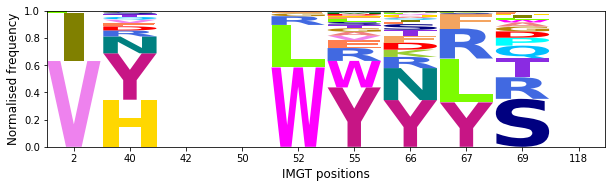

In [42]:
# from dfs plot logo figures for each of sdAbs and Abs 
make_sequence_logo(abs_struc_df, colour_palette)

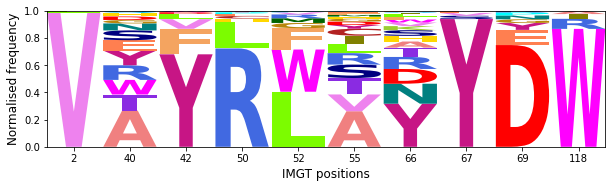

In [43]:
make_sequence_logo(sdabs_struc_df, colour_palette)